# ML sur prévision population

In [1]:
import numpy as np
from prophet import Prophet
import pandas as pd
import logging
import os

# Charger le jeu de données
data_folder = "datasets/datasets_destination/"
df_population_france_dep = pd.read_csv(os.path.join(data_folder, "df_population_france_dep.csv"))

# Préparer le DataFrame
df_ml_population_france_dep = df_population_france_dep.copy()
df_ml_population_france_dep = df_ml_population_france_dep.drop(columns=['dimensions.SEX', 'dimensions.EP_MEASURE', 'dimensions.AGE', 'attributes.OBS_STATUS_FR', 'dimensions.GEO'])
df_ml_population_france_dep['code_dep_population'] = df_ml_population_france_dep['code_dep_population'].apply(lambda x: '201' if x == '2A' else ('202' if x == '2B' else x))
df_ml_population_france_dep['code_dep_population'] = df_ml_population_france_dep['code_dep_population'].astype(int)
df_ml_population_france_dep = df_ml_population_france_dep.sort_values(by=['code_dep_population', 'population_annee'], ascending=[True, True])

# Ajouter une feature de retard pour capturer la tendance temporelle
df_ml_population_france_dep['population_t-1'] = df_ml_population_france_dep.groupby('code_dep_population')['population'].shift(1)
df_ml_population_france_dep.dropna(inplace=True)

# Configurer le niveau de journalisation pour Prophet
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)
logging.getLogger('prophet').setLevel(logging.ERROR)

# Supposons que df_ml_population_france_dep soit votre DataFrame
results = []

# Boucle sur chaque département
for dept in df_ml_population_france_dep['code_dep_population'].unique():
    # Filtrer les données pour le département courant
    dept_data = df_ml_population_france_dep[df_ml_population_france_dep['code_dep_population'] == dept]

    # Vérifier si des données sont présentes
    if dept_data.empty:
        continue

    # Préparer les données pour Prophet
    df_prophet = dept_data[['population_annee', 'population']].rename(columns={'population_annee': 'ds', 'population': 'y'})
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')

    # Initialiser et configurer le modèle Prophet
    model = Prophet(
        yearly_seasonality=False,
        seasonality_mode='additive',  # Essayez le mode additif
        changepoint_prior_scale=0.1,  # Réduisez la sensibilité aux changements
        n_changepoints=5  # Augmentez le nombre de points de changement pour plus de flexibilité
    )

    model.fit(df_prophet)

    # Créer un DataFrame pour les prédictions futures
    future = model.make_future_dataframe(periods=1, freq='YE')

    # Faire des prédictions
    forecast = model.predict(future)

    # Extraire la prédiction pour la dernière date prédite
    prediction_2026 = forecast['yhat'].iloc[-1]

    # Stocker les résultats avec l'année de prédiction
    results.append({
        'code_dep_population': dept,
        'population_annee': 2026,
        'population': prediction_2026
    })

# Convertir les résultats en DataFrame
df_results_prophet = pd.DataFrame(results)

# Concaténer les DataFrames
df_concatenated_population = pd.concat([df_ml_population_france_dep, df_results_prophet], axis=0)
df_concatenated_population = df_concatenated_population.drop(columns=['population_t-1'])

# Réinitialiser l'index
df_concatenated_population['population'] = df_concatenated_population['population'].astype(int)
df_concatenated_population.reset_index(drop=True, inplace=True)



15:05:08 - cmdstanpy - INFO - Chain [1] start processing
15:05:08 - cmdstanpy - INFO - Chain [1] done processing
15:05:08 - cmdstanpy - INFO - Chain [1] start processing
15:05:08 - cmdstanpy - INFO - Chain [1] done processing
15:05:08 - cmdstanpy - INFO - Chain [1] start processing
15:05:08 - cmdstanpy - INFO - Chain [1] done processing
15:05:08 - cmdstanpy - INFO - Chain [1] start processing
15:05:08 - cmdstanpy - INFO - Chain [1] done processing
15:05:08 - cmdstanpy - INFO - Chain [1] start processing
15:05:08 - cmdstanpy - INFO - Chain [1] done processing
15:05:08 - cmdstanpy - INFO - Chain [1] start processing
15:05:08 - cmdstanpy - INFO - Chain [1] done processing
15:05:08 - cmdstanpy - INFO - Chain [1] start processing
15:05:08 - cmdstanpy - INFO - Chain [1] done processing
15:05:09 - cmdstanpy - INFO - Chain [1] start processing
15:05:09 - cmdstanpy - INFO - Chain [1] done processing
15:05:09 - cmdstanpy - INFO - Chain [1] start processing
15:05:09 - cmdstanpy - INFO - Chain [1]

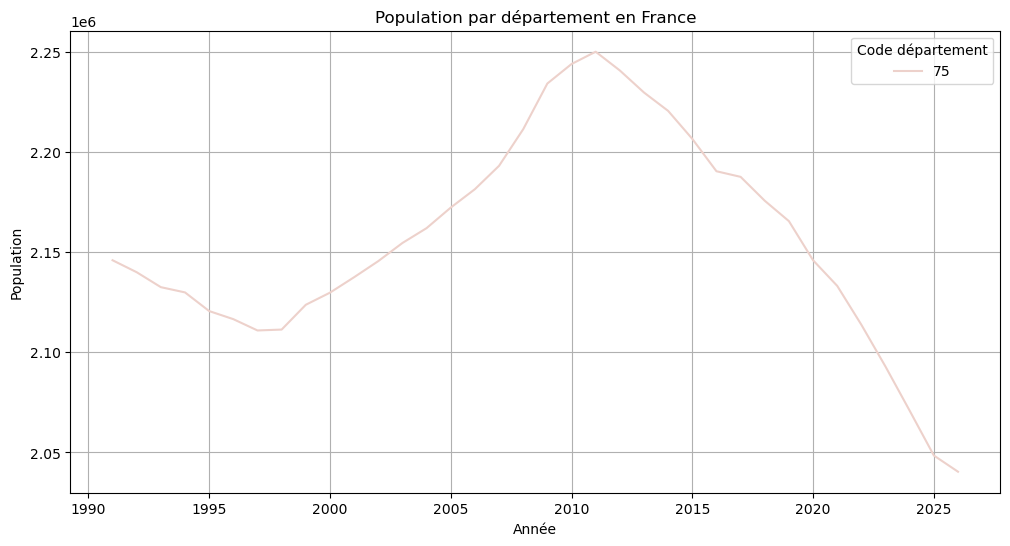

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

df_concatenated_population.loc[df_concatenated_population['code_dep_population'] == 75]

df_paris = df_concatenated_population.loc[df_concatenated_population['code_dep_population'] == 75]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_paris, x='population_annee', y='population', hue='code_dep_population')
plt.title('Population par département en France')
plt.xlabel('Année')
plt.ylabel('Population')
plt.legend(title='Code département')
plt.grid(True)
plt.show()



In [3]:
import numpy as np
from prophet import Prophet
import pandas as pd
import logging
import os

# Charger le jeu de données
data_folder = "datasets/datasets_destination/"
df_naissance_france_dep = pd.read_csv(os.path.join(data_folder, "df_naissances_annuelles_france_dep.csv"))

# Préparer le DataFrame
df_ml_naissance_france_dep = df_naissance_france_dep.copy()
df_ml_naissance_france_dep = df_ml_naissance_france_dep.drop(columns=['dimensions.GEO', 'dimensions.EC_MEASURE', 'dimensions.FREQ', 'attributes.OBS_STATUS_FR'])
df_ml_naissance_france_dep['code_dep_naissances'] = df_ml_naissance_france_dep['code_dep_naissances'].apply(lambda x: '201' if x == '2A' else ('202' if x == '2B' else x))
df_ml_naissance_france_dep['code_dep_naissances'] = df_ml_naissance_france_dep['code_dep_naissances'].astype(int)
df_ml_naissance_france_dep = df_ml_naissance_france_dep.sort_values(by=['code_dep_naissances', 'nb_naissances_annee'], ascending=[True, True])

# Ajouter une feature de retard pour capturer la tendance temporelle
df_ml_naissance_france_dep['nb_naissances_t-1'] = df_ml_naissance_france_dep.groupby('code_dep_naissances')['nb_naissances'].shift(1)
df_ml_naissance_france_dep.dropna(inplace=True)

# Configurer le niveau de journalisation pour Prophet
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)
logging.getLogger('prophet').setLevel(logging.ERROR)

# Liste pour stocker les résultats
results = []

# Boucle sur chaque département
for dept in df_ml_naissance_france_dep['code_dep_naissances'].unique():
    # Filtrer les données pour le département courant
    dept_data = df_ml_naissance_france_dep[df_ml_naissance_france_dep['code_dep_naissances'] == dept]

    # Vérifier si des données sont présentes
    if dept_data.empty:
        continue

    # Préparer les données pour Prophet
    df_prophet = dept_data[['nb_naissances_annee', 'nb_naissances']].rename(columns={'nb_naissances_annee': 'ds', 'nb_naissances': 'y'})
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')

    # Initialiser et configurer le modèle Prophet
    model = Prophet(
        yearly_seasonality=False,
        seasonality_mode='additive',  # Essayez le mode additif
        changepoint_prior_scale=0.1,  # Réduisez la sensibilité aux changements
        n_changepoints=5  # Augmentez le nombre de points de changement pour plus de flexibilité
    )

    model.fit(df_prophet)

    # Créer un DataFrame pour les prédictions futures (2025 et 2026)
    future = model.make_future_dataframe(periods=3, freq='YE')  # 2 ans de prévision

    # Faire des prédictions
    forecast = model.predict(future)

    # Extraire les prédictions pour 2025 et 2026
    for year in [2025, 2026]:
        prediction = forecast.loc[forecast['ds'].dt.year == year, 'yhat'].values
        if len(prediction) > 0:
            results.append({
                'code_dep_naissances': dept,
                'nb_naissances_annee': year,
                'nb_naissances': prediction[0]
            })

# Convertir les résultats en DataFrame
df_results_prophet = pd.DataFrame(results)

# Concaténer les DataFrames
df_concatenated_naissance = pd.concat([df_ml_naissance_france_dep, df_results_prophet], axis=0)
df_concatenated_naissance = df_concatenated_naissance.drop(columns=['nb_naissances_t-1'])

# Réinitialiser l'index
df_concatenated_naissance['nb_naissances'] = df_concatenated_naissance['nb_naissances'].astype(int)
df_concatenated_naissance.reset_index(drop=True, inplace=True)


In [4]:
df_concatenated_naissance.loc[df_concatenated_naissance['code_dep_naissances'] == 59]

,nb_naissances_annee,nb_naissances,code_dep_naissances
513,2016,33501,59
514,2017,32304,59
515,2018,31396,59
516,2019,31096,59
517,2020,30145,59
518,2021,30010,59
519,2022,28956,59
520,2023,27488,59
521,2024,26560,59
1014,2025,24126,59


In [5]:
df_concatenated_naissance = df_concatenated_naissance.sort_values(by=['code_dep_naissances', 'nb_naissances_annee'], ascending=[True, True])
df_concatenated_population = df_concatenated_population.sort_values(by=['code_dep_population', 'population_annee'], ascending=[True, True])
df_concatenated_naissance.to_csv("datasets/datasets_destination/df_naissances_annuelles_france_dep_ml_prophet_2025_2026.csv", index=False)
df_concatenated_population.to_csv("datasets/datasets_destination/df_population_france_dep_ml_prophet_2025_2026.csv", index=False)

# ML sur données CAF

In [6]:
import requests
import pandas as pd
import json

def fetch_data_caf(link_dataset, link_label):
    """Télécharge les données et les labels depuis l'API avec gestion des erreurs."""
    try:
        r_data = requests.get(link_dataset, timeout=10)
        r_data.raise_for_status()
        json_r_data = r_data.json()
        df_data = pd.json_normalize(json_r_data)
    except requests.RequestException as e:
        print(f"Erreur lors de la récupération des données depuis {link_dataset} : {e}")
        df_data = pd.DataFrame()
    except ValueError as e:
        print(f"Erreur de décodage JSON pour {link_dataset} : {e}")
        df_data = pd.DataFrame()

    try:
        r_label = requests.get(link_label, timeout=10)
        r_label.raise_for_status()
        json_r_label = r_label.json()
        df_label = pd.json_normalize(json_r_label, record_path="fields")
    except requests.RequestException as e:
        print(f"Erreur lors de la récupération des labels depuis {link_label} : {e}")
        df_label = pd.DataFrame()
    except ValueError as e:
        print(f"Erreur de décodage JSON pour {link_label} : {e}")
        df_label = pd.DataFrame()

    return df_data, df_label

def convert_to_quarter_chomage(date_str):
    year, month = map(int, date_str.split('-'))
    quarter = (month - 1) // 3 + 1
    year = year - 2
    return f"T{quarter}_{year}"

def convert_to_year_population(date_str):
    year, month = map(int, date_str.split('-'))
    year = year
    return f"{year}"


df_s_ben_dep_data, df_s_ben_dep_label = fetch_data_caf(
    "https://data.caf.fr/api/explore/v2.1/catalog/datasets/s_ben_dep/exports/json",
    "https://data.caf.fr/api/explore/v2.1/catalog/datasets/s_ben_dep"
)

df_s_ben_dep_data["trimestre_chomage"] = df_s_ben_dep_data["dtreffre"].apply(convert_to_quarter_chomage).copy()
df_s_ben_dep_data["annee_population"] = df_s_ben_dep_data["dtreffre"].apply(convert_to_year_population).copy()

departement_drop = ['99', '978', '976', 'XX']
df_s_ben_dep_data = df_s_ben_dep_data.loc[~df_s_ben_dep_data['numdep'].isin(departement_drop)].copy()

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import re
import os

data_folder = "datasets/datasets_destination/"

# Charger les datasets
chomage_df = pd.read_csv(f'{data_folder}/df_chomage_BIT_france_dep.csv')
naissances_df = pd.read_csv(f'{data_folder}/df_naissances_annuelles_france_dep_ml_prophet_2025_2026.csv')
population_df = pd.read_csv(f'{data_folder}/df_population_france_dep_ml_prophet_2025_2026.csv')

df_s_ben_dep_data['numdep'] = df_s_ben_dep_data['numdep'].apply(lambda x: '201' if x == '2A' else ('202' if x == '2B' else x))
chomage_df['Code'] = chomage_df['REF_AREA'].apply(lambda x: re.search(r'D(.*)', x).group(1))
chomage_df['Trimestre'] = chomage_df['TIME_PERIOD'].str.replace('-Q', '-T')
chomage_df['Trimestre'] = chomage_df['Trimestre'].apply(lambda x: f"{x.split('-')[1]}_{x.split('-')[0]}")
chomage_df['Code'] = chomage_df['Code'].apply(lambda x: '201' if x == '2A' else ('202' if x == '2B' else x))

df_s_ben_dep_data["trimestre_chomage"] = df_s_ben_dep_data["trimestre_chomage"].astype(str)
df_s_ben_dep_data["annee_population"] = df_s_ben_dep_data["annee_population"].astype(int)
df_s_ben_dep_data["numdep"] = df_s_ben_dep_data["numdep"].astype(int)
chomage_df["Code"] = chomage_df["Code"].astype(int)
population_df["population_annee"] = population_df["population_annee"].astype(int)
population_df["code_dep_population"] = population_df["code_dep_population"].astype(int)
population_df["population"] = population_df["population"].astype(int)
naissances_df["nb_naissances_annee"] = naissances_df["nb_naissances_annee"].astype(int)
naissances_df["code_dep_naissances"] = naissances_df["code_dep_naissances"].astype(int)
naissances_df["nb_naissances"] = naissances_df["nb_naissances"].astype(int)

df_s_ben_dep_data = df_s_ben_dep_data.merge(chomage_df[['Code','Trimestre','OBS_VALUE']], 
                            left_on=["trimestre_chomage", "numdep"],
                            right_on=["Trimestre", "Code"],
                            how="left")

df_s_ben_dep_data = df_s_ben_dep_data.merge(population_df[['code_dep_population','population','population_annee']],
                                                    left_on=["annee_population", "numdep"],
                                                    right_on=["population_annee", "code_dep_population"],
                                                    how="left")

df_s_ben_dep_data = df_s_ben_dep_data.merge(naissances_df[['code_dep_naissances','nb_naissances','nb_naissances_annee']],
                                                    left_on=["annee_population", "numdep"],
                                                    right_on=["nb_naissances_annee", "code_dep_naissances"],
                                                    how="left")

df_s_ben_dep_data = df_s_ben_dep_data.rename(columns={"OBS_VALUE": "taux_chomage"})
df_s_ben_dep_data['taux_chomage'] = df_s_ben_dep_data['taux_chomage'].astype(float)
df_s_ben_dep_data['population'] = df_s_ben_dep_data['population'].astype(float)
df_s_ben_dep_data['nb_naissances'] = df_s_ben_dep_data['nb_naissances'].astype(float)
df_s_ben_dep_data = df_s_ben_dep_data.drop(columns=['Code','annee_population','Trimestre',
                                                            'code_dep_naissances','nb_naissances_annee',
                                                            'code_dep_population','population_annee'])

df_s_ben_dep_data["dtreffre"] = pd.to_datetime(df_s_ben_dep_data["dtreffre"])
df_s_ben_dep_data["year"] = df_s_ben_dep_data["dtreffre"].dt.year
df_s_ben_dep_data["month"] = df_s_ben_dep_data["dtreffre"].dt.month


In [8]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df_column_to_keep = ['numdep','indmtt_ndur','taux_chomage','population','nb_naissances','year','month']

df_ml_ben_dep_data = df_s_ben_dep_data.copy()
df_ml_ben_dep_data = df_ml_ben_dep_data.select_dtypes(include="number")
df_ml_ben_dep_data = df_ml_ben_dep_data[df_column_to_keep].copy()

X = df_ml_ben_dep_data.drop(columns=["indmtt_ndur"])
y = df_ml_ben_dep_data["indmtt_ndur"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model with the best parameters found
rf_best = RandomForestRegressor(
    n_estimators=250,
    max_depth=20,
    min_samples_split=20,
    min_samples_leaf=4,
    bootstrap=True,
    random_state=42
)

# Fit the model
rf_best.fit(X_train, y_train)

# Predict
y_pred_train_rf = rf_best.predict(X_train)
y_pred_test_rf = rf_best.predict(X_test)

# Calculate metrics for Random Forest
def calculate_metrics(y_train, y_pred_train, y_test, y_pred_test):
    mae_train = mean_absolute_error(y_train, y_pred_train)
    rmse_train = mean_squared_error(y_train, y_pred_train) ** 0.5
    r2_train = r2_score(y_train, y_pred_train)
    
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = mean_squared_error(y_test, y_pred_test) ** 0.5
    r2_test = r2_score(y_test, y_pred_test)

    return mae_train, rmse_train, r2_train, mae_test, rmse_test, r2_test

# Metrics for Random Forest (best model)
mae_train_rf, rmse_train_rf, r2_train_rf, mae_test_rf, rmse_test_rf, r2_test_rf = calculate_metrics(y_train, y_pred_train_rf, y_test, y_pred_test_rf)

# Print results for Random Forest
print("Random Forest Model (with best parameters):")
print(f"Train - MAE: {mae_train_rf}, RMSE: {rmse_train_rf}, R2: {r2_train_rf}")
print(f"Test - MAE: {mae_test_rf}, RMSE: {rmse_test_rf}, R2: {r2_test_rf}")



Random Forest Model (with best parameters):
Train - MAE: 1039910.684635422, RMSE: 9136841.256093556, R2: 0.9695227751697924
Test - MAE: 1170393.2670983467, RMSE: 3876280.4826144855, R2: 0.9941746881176274


In [9]:
import joblib

# Sauvegarder le modèle
joblib.dump(rf_best, "random_forest_model.pkl")
print("Modèle sauvegardé sous 'random_forest_model.pkl'")

# Export de df_s_ben_dep_data vers df_s_ben_dep_data_ml.csv
df_s_ben_dep_data.to_csv("datasets/datasets_destination/df_s_ben_dep_data_ml.csv", index=False)

Modèle sauvegardé sous 'random_forest_model.pkl'


In [ ]:
# import pandas as pd
# from prophet import Prophet
# import joblib
# import os

# # Création du dossier de sauvegarde s'il n'existe pas
# output_dir = "ml_prophet"
# os.makedirs(output_dir, exist_ok=True)

# # Chargement du DataFrame depuis le CSV départemental
# df = pd.read_csv("datasets/datasets_destination/df_s_ben_dep_data_ml.csv")
# print("Colonnes du dataframe :", df.columns.tolist())

# # Vérifier la présence de la colonne d'identification des départements
# if 'numdep' not in df.columns:
#     raise KeyError("La colonne d'identification des départements ('numdep') est introuvable dans le dataframe.")

# # Création de la colonne 'ds' attendue par Prophet à partir de 'year' et 'month'
# df['ds'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2) + '-01')

# # Renommage de la colonne cible en 'y'
# if 'indmtt_ndur' in df.columns:
#     df.rename(columns={'indmtt_ndur': 'y'}, inplace=True)
# else:
#     raise KeyError("La colonne cible 'indmtt_ndur' est introuvable dans le dataframe.")

# print("Colonnes après transformation :", df.columns.tolist())
# print(df.head())

# # Dictionnaire pour stocker les modèles par département
# models = {}

# # Extraction des codes départementaux uniques
# departements = df['numdep'].unique()

# # Entraînement d'un modèle Prophet pour chaque département
# for dep in departements:
#     df_dep = df[df['numdep'] == dep].copy()
#     df_dep = df_dep.sort_values('ds')
    
#     # Instanciation du modèle Prophet avec des paramètres adaptés
#     model = Prophet(
#         growth='linear',
#         changepoint_prior_scale=0.01,  # Tendance presque plate
#         seasonality_mode='additive',
#         yearly_seasonality=False,        # Pour capter les oscillations annuelles
#         weekly_seasonality=False,
#         daily_seasonality=False,
#     )
    
#     # Ajout des régressions supplémentaires si présentes
#     for reg in ['taux_chomage', 'population', 'nb_naissances']:
#         if reg in df_dep.columns:
#             model.add_regressor(reg)
#         else:
#             print(f"Attention : la colonne '{reg}' n'est pas présente pour le département {dep}.")
    
#     print(f"Entraînement du modèle Prophet pour le département {dep} en cours...")
#     model.fit(df_dep)
#     models[dep] = model
    
#     # Formatage du code départemental pour avoir deux chiffres (0 devant si nécessaire)
#     dep_str = str(dep).zfill(2)
#     file_path = os.path.join(output_dir, f"prophet_model_{dep_str}.pkl")
#     joblib.dump(model, file_path)
#     print(f"Modèle pour le département {dep} sauvegardé sous '{file_path}'.")


Colonnes du dataframe : ['dtreffre', 'numdep', 'nomdep', 'numregi', 'nomregi', 'indfoy_ndur', 'indnbp_ndur', 'indmtt_ndur', 'indfoy_ndurpaje', 'indnbp_ndurpaje', 'indmtt_ndurpaje', 'indfoy_pn', 'indnbp_pn', 'indmtt_pn', 'indfoy_ab', 'indnbp_ab', 'indmtt_ab', 'indfoy_cmg', 'indnbp_cmg', 'indmtt_cmg', 'indfoy_prepare', 'indnbp_prepare', 'indmtt_prepare', 'indfoy_ndurej', 'indnbp_ndurej', 'indmtt_ndurej', 'indfoy_af', 'indnbp_af', 'indmtt_af', 'indfoy_cf', 'indnbp_cf', 'indmtt_cf', 'indfoy_ars', 'indnbp_ars', 'indmtt_ars', 'indfoy_asf', 'indnbp_asf', 'indmtt_asf', 'indfoy_ndurhd', 'indnbp_ndurhd', 'indmtt_ndurhd', 'indfoy_aah', 'indben_aah', 'indnbp_aah', 'indmtt_aah', 'indfoy_aeeh', 'indben_aeeh', 'indnbp_aeeh', 'indmtt_aeeh', 'indfoy_ajpa', 'indben_ajpa', 'indnbp_ajpa', 'indmtt_ajpa', 'indfoy_ajpp', 'indben_ajpp', 'indnbp_ajpp', 'indmtt_ajpp', 'indfoy_ndural', 'indnbp_ndural', 'indmtt_ndural', 'indfoy_alf', 'indnbp_alf', 'indmtt_alf', 'indfoy_als', 'indnbp_als', 'indmtt_als', 'indfoy_ap

In [11]:
import pandas as pd
from prophet import Prophet
import joblib
import os

# Liste des colonnes cibles à modéliser
target_columns = ['indmtt_ndur', 'indmtt_ndurpaje', 'indmtt_pn', 'indmtt_ndurej']

# Chargement du DataFrame
df = pd.read_csv("datasets/datasets_destination/df_s_ben_dep_data_ml.csv")
print("Colonnes du dataframe :", df.columns.tolist())

# Vérification de la colonne 'numdep'
if 'numdep' not in df.columns:
    raise KeyError("La colonne 'numdep' est requise mais introuvable.")

# Création de la colonne 'ds' attendue par Prophet
df['ds'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2) + '-01')

# Extraction des départements
departements = df['numdep'].unique()

# Boucle sur les colonnes cibles
for target in target_columns:
    if target not in df.columns:
        print(f"⚠️  Colonne cible '{target}' absente, modèle non généré.")
        continue

    print(f"\n### Traitement de la target : {target} ###")
    
    # Création d’un dossier de sortie spécifique à la target
    output_dir = os.path.join("ml_prophet", target)
    os.makedirs(output_dir, exist_ok=True)
    
    # Boucle sur les départements
    for dep in departements:
        df_dep = df[df['numdep'] == dep].copy()
        df_dep = df_dep.sort_values('ds')
        
        df_dep = df_dep.rename(columns={target: 'y'})
        
        # Si la target est entièrement nulle ou NaN, on passe
        if df_dep['y'].isna().all() or df_dep['y'].sum() == 0:
            print(f"❌ Données insuffisantes pour le département {dep} - target {target}")
            continue
        
        model = Prophet(
            growth='linear',
            changepoint_prior_scale=0.01,
            seasonality_mode='additive',
            yearly_seasonality=False,
            weekly_seasonality=False,
            daily_seasonality=False,
        )
        
        for reg in ['taux_chomage', 'population', 'nb_naissances']:
            if reg in df_dep.columns:
                model.add_regressor(reg)
            else:
                print(f"⚠️  '{reg}' absent dans les données du département {dep}.")
        
        print(f"🔧 Entraînement du modèle pour {target} - Département {dep}...")
        model.fit(df_dep)
        
        # Sauvegarde du modèle
        dep_str = str(dep).zfill(2)
        file_path = os.path.join(output_dir, f"prophet_model_{dep_str}.pkl")
        joblib.dump(model, file_path)
        print(f"✅ Modèle sauvegardé : {file_path}")


Colonnes du dataframe : ['dtreffre', 'numdep', 'nomdep', 'numregi', 'nomregi', 'indfoy_ndur', 'indnbp_ndur', 'indmtt_ndur', 'indfoy_ndurpaje', 'indnbp_ndurpaje', 'indmtt_ndurpaje', 'indfoy_pn', 'indnbp_pn', 'indmtt_pn', 'indfoy_ab', 'indnbp_ab', 'indmtt_ab', 'indfoy_cmg', 'indnbp_cmg', 'indmtt_cmg', 'indfoy_prepare', 'indnbp_prepare', 'indmtt_prepare', 'indfoy_ndurej', 'indnbp_ndurej', 'indmtt_ndurej', 'indfoy_af', 'indnbp_af', 'indmtt_af', 'indfoy_cf', 'indnbp_cf', 'indmtt_cf', 'indfoy_ars', 'indnbp_ars', 'indmtt_ars', 'indfoy_asf', 'indnbp_asf', 'indmtt_asf', 'indfoy_ndurhd', 'indnbp_ndurhd', 'indmtt_ndurhd', 'indfoy_aah', 'indben_aah', 'indnbp_aah', 'indmtt_aah', 'indfoy_aeeh', 'indben_aeeh', 'indnbp_aeeh', 'indmtt_aeeh', 'indfoy_ajpa', 'indben_ajpa', 'indnbp_ajpa', 'indmtt_ajpa', 'indfoy_ajpp', 'indben_ajpp', 'indnbp_ajpp', 'indmtt_ajpp', 'indfoy_ndural', 'indnbp_ndural', 'indmtt_ndural', 'indfoy_alf', 'indnbp_alf', 'indmtt_alf', 'indfoy_als', 'indnbp_als', 'indmtt_als', 'indfoy_ap